## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head(2)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1


In [2]:
import seaborn as sns

<Axes: xlabel='IS_SUCCESSFUL', ylabel='count'>

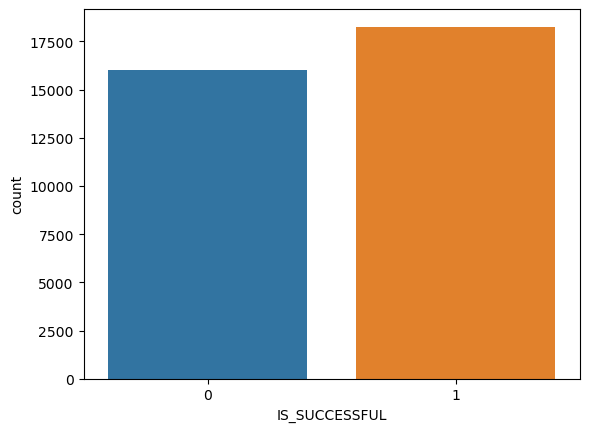

In [3]:
sns.countplot(x ='IS_SUCCESSFUL',data = application_df )

## This bar plot shows relatively well balanced data

In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN','NAME'], axis = 1)
application_df.head(2)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1


In [5]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable named `application_types_to_replace`
application_types_to_replace = list(application_type_counts[application_type_counts<=156].index)
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# # Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()


T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_value_count = application_df.CLASSIFICATION.value_counts()
classification_value_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_value_count[classification_value_count>1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_value_count[classification_value_count<=777].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
scaled_df = pd.get_dummies(application_df)
scaled_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [13]:
#Original data before spliting to X_train and X_train
scaled_df.shape

(34299, 44)

In [14]:
scaled_df['IS_SUCCESSFUL'].value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [15]:
# Split our preprocessed data into our features and target arrays
X= scaled_df.drop('IS_SUCCESSFUL', axis = 1).values
y= scaled_df['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)


In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
# We can see that 25 percent of the data is assigned to the X_test by defualt
X_train.shape

(24009, 43)

## Compile, Train and Evaluate the Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = Sequential()

# First hidden layer
nn.add(Dense(units = 80, activation = 'relu', input_dim = len(X_train[0])))

# Second hidden layer
nn.add(Dense(units = 30, activation = 'relu'))

# Output layer for binary classification problem using sigmoid activation function
nn.add(Dense(units = 1, activation = "sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
# Train the model
nn.fit(X_train_scaled, y_train, validation_data = (X_test_scaled,y_test), epochs=200)

Epoch 1/200
751/751 [==============================] - 5s 5ms/step - loss: 0.5722 - accuracy: 0.7192 - val_loss: 0.5561 - val_accuracy: 0.7291
Epoch 2/200
751/751 [==============================] - 3s 4ms/step - loss: 0.5555 - accuracy: 0.7282 - val_loss: 0.5554 - val_accuracy: 0.7291
Epoch 3/200
751/751 [==============================] - 3s 4ms/step - loss: 0.5525 - accuracy: 0.7299 - val_loss: 0.5557 - val_accuracy: 0.7276
Epoch 4/200
751/751 [==============================] - 3s 4ms/step - loss: 0.5508 - accuracy: 0.7296 - val_loss: 0.5555 - val_accuracy: 0.7284
Epoch 5/200
751/751 [==============================] - 3s 4ms/step - loss: 0.5501 - accuracy: 0.7311 - val_loss: 0.5522 - val_accuracy: 0.7302
Epoch 6/200
751/751 [==============================] - 3s 4ms/step - loss: 0.5481 - accuracy: 0.7329 - val_loss: 0.5570 - val_accuracy: 0.7273
Epoch 7/200
751/751 [==============================] - 3s 4ms/step - loss: 0.5476 - accuracy: 0.7322 - val_loss: 0.5534 - val_accuracy: 0.7290

Epoch 58/200
751/751 [==============================] - 3s 4ms/step - loss: 0.5365 - accuracy: 0.7386 - val_loss: 0.5539 - val_accuracy: 0.7304
Epoch 59/200
751/751 [==============================] - 3s 4ms/step - loss: 0.5369 - accuracy: 0.7384 - val_loss: 0.5534 - val_accuracy: 0.7306
Epoch 60/200
751/751 [==============================] - 3s 4ms/step - loss: 0.5367 - accuracy: 0.7387 - val_loss: 0.5521 - val_accuracy: 0.7323
Epoch 61/200
751/751 [==============================] - 3s 4ms/step - loss: 0.5365 - accuracy: 0.7387 - val_loss: 0.5555 - val_accuracy: 0.7304
Epoch 62/200
751/751 [==============================] - 3s 4ms/step - loss: 0.5365 - accuracy: 0.7393 - val_loss: 0.5539 - val_accuracy: 0.7285
Epoch 63/200
751/751 [==============================] - 3s 4ms/step - loss: 0.5365 - accuracy: 0.7374 - val_loss: 0.5536 - val_accuracy: 0.7315
Epoch 64/200
751/751 [==============================] - 3s 4ms/step - loss: 0.5361 - accuracy: 0.7383 - val_loss: 0.5570 - val_accuracy:

Epoch 115/200
751/751 [==============================] - 2s 2ms/step - loss: 0.5356 - accuracy: 0.7400 - val_loss: 0.5596 - val_accuracy: 0.7299
Epoch 116/200
751/751 [==============================] - 2s 2ms/step - loss: 0.5336 - accuracy: 0.7393 - val_loss: 0.5593 - val_accuracy: 0.7299
Epoch 117/200
751/751 [==============================] - 1s 2ms/step - loss: 0.5333 - accuracy: 0.7397 - val_loss: 0.5603 - val_accuracy: 0.7304
Epoch 118/200
751/751 [==============================] - 2s 2ms/step - loss: 0.5337 - accuracy: 0.7411 - val_loss: 0.5586 - val_accuracy: 0.7314
Epoch 119/200
751/751 [==============================] - 2s 2ms/step - loss: 0.5334 - accuracy: 0.7398 - val_loss: 0.5597 - val_accuracy: 0.7307
Epoch 120/200
751/751 [==============================] - 2s 2ms/step - loss: 0.5335 - accuracy: 0.7406 - val_loss: 0.5598 - val_accuracy: 0.7302
Epoch 121/200
751/751 [==============================] - 1s 2ms/step - loss: 0.5336 - accuracy: 0.7404 - val_loss: 0.5609 - val_ac

751/751 [==============================] - 2s 2ms/step - loss: 0.5318 - accuracy: 0.7407 - val_loss: 0.5624 - val_accuracy: 0.7301
Epoch 172/200
751/751 [==============================] - 3s 4ms/step - loss: 0.5323 - accuracy: 0.7412 - val_loss: 0.5625 - val_accuracy: 0.7317
Epoch 173/200
751/751 [==============================] - 3s 4ms/step - loss: 0.5319 - accuracy: 0.7418 - val_loss: 0.5638 - val_accuracy: 0.7299
Epoch 174/200
751/751 [==============================] - 3s 4ms/step - loss: 0.5321 - accuracy: 0.7414 - val_loss: 0.5627 - val_accuracy: 0.7307
Epoch 175/200
751/751 [==============================] - 3s 4ms/step - loss: 0.5321 - accuracy: 0.7413 - val_loss: 0.5634 - val_accuracy: 0.7292
Epoch 176/200
751/751 [==============================] - 3s 4ms/step - loss: 0.5318 - accuracy: 0.7409 - val_loss: 0.5667 - val_accuracy: 0.7270
Epoch 177/200
751/751 [==============================] - 3s 4ms/step - loss: 0.5323 - accuracy: 0.7402 - val_loss: 0.5656 - val_accuracy: 0.7302

In [22]:
model_losses_df = pd.DataFrame(nn.history.history)
model_losses_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.572223,0.719230,0.556069,0.729057
1,0.555529,0.728227,0.555431,0.729057
2,0.552501,0.729935,0.555730,0.727600
3,0.550820,0.729601,0.555534,0.728377
4,0.550064,0.731101,0.552195,0.730224


<Axes: >

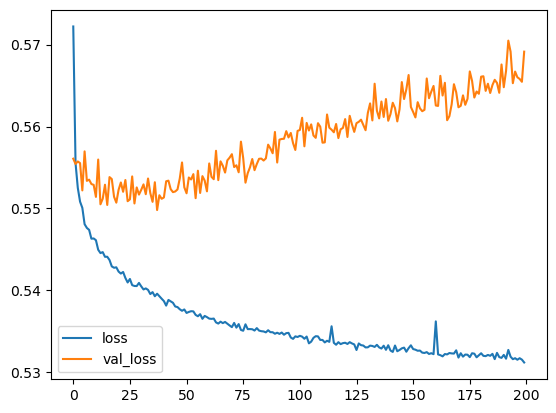

In [23]:
#Pplot the loss vs val_loss to see for any overfit and/or see the rate of change of one to the other

model_losses_df[['loss','val_loss']].plot()

## In the above plot, a loss is from the training data set while val-loss is a loss from the test set. From this plot, we learn that our validation loss increased while the loss decreased. This is an indication of overfitting the model.

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

322/322 - 1s - loss: 0.5691 - accuracy: 0.7287 - 751ms/epoch - 2ms/step
Loss: 0.5691483020782471, Accuracy: 0.7286686301231384


## This model evaluation data indicated that, it has an accuracy of around 72 percent with an epoch of 200.However, it is evident from the plot that, an epoch of 200 is too long due to the fact that the loss and the val_loss is no more tracked each other. As a result, I decided to include an early stopping mechanism so that the system automatically stops when the rate of change of the loss and the val_loss are no more significant.  

In [25]:
# Adding an early stopping (callback) mechanism
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
#This callback will stop the training when there is no improvement in the loss for 25 consecutive epochs.
early_stop = EarlyStopping(monitor = 'val_loss' , mode = 'min', verbose = 1, patience = 25)

In [27]:
# Train the model
nn.fit(X_train_scaled, y_train, validation_data = (X_test_scaled,y_test), epochs=200, callbacks = [early_stop])

Epoch 1/200
751/751 [==============================] - 3s 4ms/step - loss: 0.5321 - accuracy: 0.7414 - val_loss: 0.5680 - val_accuracy: 0.7281
Epoch 2/200
751/751 [==============================] - 3s 4ms/step - loss: 0.5316 - accuracy: 0.7411 - val_loss: 0.5672 - val_accuracy: 0.7306
Epoch 3/200
751/751 [==============================] - 3s 4ms/step - loss: 0.5316 - accuracy: 0.7416 - val_loss: 0.5666 - val_accuracy: 0.7301
Epoch 4/200
751/751 [==============================] - 4s 5ms/step - loss: 0.5316 - accuracy: 0.7416 - val_loss: 0.5670 - val_accuracy: 0.7299
Epoch 5/200
751/751 [==============================] - 4s 5ms/step - loss: 0.5318 - accuracy: 0.7415 - val_loss: 0.5672 - val_accuracy: 0.7290
Epoch 6/200
751/751 [==============================] - 3s 4ms/step - loss: 0.5314 - accuracy: 0.7411 - val_loss: 0.5671 - val_accuracy: 0.7312
Epoch 7/200
751/751 [==============================] - 3s 4ms/step - loss: 0.5318 - accuracy: 0.7413 - val_loss: 0.5671 - val_accuracy: 0.7284

In [28]:
model_losses_df = pd.DataFrame(nn.history.history)
model_losses_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.532078,0.741430,0.568049,0.728086
1,0.531621,0.741097,0.567167,0.730612
2,0.531556,0.741555,0.566643,0.730126
3,0.531602,0.741555,0.566962,0.729932
4,0.531803,0.741472,0.567201,0.728960


<Axes: >

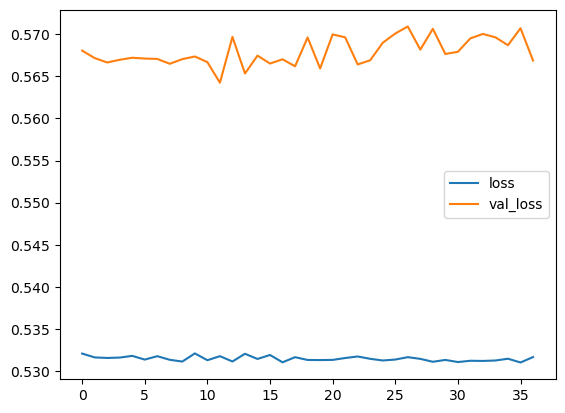

In [29]:
# plot the loss vs val_loss to see for any overfit and/or see the rate of change of one to the other 
# following the early stopping mechanism

model_losses_df[['loss','val_loss']].plot()

## Not a good result at all. Let's add the Dropout layers and see if the model perfroamce improves

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

322/322 - 1s - loss: 0.5669 - accuracy: 0.7309 - 722ms/epoch - 2ms/step
Loss: 0.5668701529502869, Accuracy: 0.7309038043022156


   ## For preventing an overfitting. I added a Dropout layer from tensorflow library. The Dropout layer randomly sets input units to 0 with a frequency of `rate` at each step   during training time, which helps prevent overfitting. In my case I have decided to turn off half the input at a time during each epoch. 

In [31]:
# Dropout
from tensorflow.keras.layers import Dropout

In [32]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = Sequential()

# First hidden layer
nn.add(Dense(units = 80,activation = 'relu', input_dim = 43, name = 'layer1'))
# Added dropout layer
nn.add(Dropout(0.5))
# Second hidden layer
nn.add(Dense(units = 30,activation = 'relu', name = 'layer2'))
# Added dropout layer
nn.add(Dropout(0.5))
# Output layer for binary classification problem using sigmoid activation function
nn.add(Dense(units = 1,activation = "sigmoid"))
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
# Train the model
nn.fit(X_train_scaled, y_train, validation_data = (X_test_scaled,y_test), epochs=200, callbacks = [early_stop])

Epoch 1/200
751/751 [==============================] - 5s 5ms/step - loss: 0.6392 - accuracy: 0.6722 - val_loss: 0.5735 - val_accuracy: 0.7255
Epoch 2/200
751/751 [==============================] - 3s 5ms/step - loss: 0.5939 - accuracy: 0.7146 - val_loss: 0.5677 - val_accuracy: 0.7256
Epoch 3/200
751/751 [==============================] - 3s 5ms/step - loss: 0.5838 - accuracy: 0.7195 - val_loss: 0.5610 - val_accuracy: 0.7305
Epoch 4/200
751/751 [==============================] - 3s 5ms/step - loss: 0.5796 - accuracy: 0.7213 - val_loss: 0.5659 - val_accuracy: 0.7293
Epoch 5/200
751/751 [==============================] - 3s 5ms/step - loss: 0.5752 - accuracy: 0.7233 - val_loss: 0.5620 - val_accuracy: 0.7264
Epoch 6/200
751/751 [==============================] - 3s 5ms/step - loss: 0.5739 - accuracy: 0.7242 - val_loss: 0.5580 - val_accuracy: 0.7290
Epoch 7/200
751/751 [==============================] - 3s 5ms/step - loss: 0.5710 - accuracy: 0.7234 - val_loss: 0.5589 - val_accuracy: 0.7259

Epoch 58/200
751/751 [==============================] - 3s 5ms/step - loss: 0.5590 - accuracy: 0.7280 - val_loss: 0.5526 - val_accuracy: 0.7310
Epoch 59/200
751/751 [==============================] - 3s 5ms/step - loss: 0.5575 - accuracy: 0.7328 - val_loss: 0.5519 - val_accuracy: 0.7304
Epoch 60/200
751/751 [==============================] - 3s 5ms/step - loss: 0.5570 - accuracy: 0.7312 - val_loss: 0.5524 - val_accuracy: 0.7298
Epoch 61/200
751/751 [==============================] - 3s 5ms/step - loss: 0.5573 - accuracy: 0.7317 - val_loss: 0.5512 - val_accuracy: 0.7306
Epoch 62/200
751/751 [==============================] - 3s 5ms/step - loss: 0.5557 - accuracy: 0.7308 - val_loss: 0.5524 - val_accuracy: 0.7300
Epoch 63/200
751/751 [==============================] - 3s 5ms/step - loss: 0.5584 - accuracy: 0.7288 - val_loss: 0.5512 - val_accuracy: 0.7302
Epoch 64/200
751/751 [==============================] - 3s 5ms/step - loss: 0.5574 - accuracy: 0.7300 - val_loss: 0.5520 - val_accuracy:

Epoch 115/200
751/751 [==============================] - 3s 5ms/step - loss: 0.5545 - accuracy: 0.7309 - val_loss: 0.5498 - val_accuracy: 0.7316
Epoch 116/200
751/751 [==============================] - 3s 5ms/step - loss: 0.5552 - accuracy: 0.7316 - val_loss: 0.5495 - val_accuracy: 0.7313
Epoch 117/200
751/751 [==============================] - 3s 5ms/step - loss: 0.5544 - accuracy: 0.7319 - val_loss: 0.5512 - val_accuracy: 0.7315
Epoch 118/200
751/751 [==============================] - 3s 4ms/step - loss: 0.5548 - accuracy: 0.7324 - val_loss: 0.5516 - val_accuracy: 0.7310
Epoch 119/200
751/751 [==============================] - 3s 5ms/step - loss: 0.5562 - accuracy: 0.7305 - val_loss: 0.5522 - val_accuracy: 0.7318
Epoch 120/200
751/751 [==============================] - 3s 5ms/step - loss: 0.5540 - accuracy: 0.7328 - val_loss: 0.5496 - val_accuracy: 0.7316
Epoch 121/200
751/751 [==============================] - 3s 5ms/step - loss: 0.5532 - accuracy: 0.7320 - val_loss: 0.5500 - val_ac

In [34]:
model_losses_df = pd.DataFrame(nn.history.history)
model_losses_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.639174,0.672248,0.573527,0.725462
1,0.593870,0.714607,0.567697,0.725559
2,0.583769,0.719480,0.561024,0.730515
3,0.579595,0.721313,0.565926,0.729252
4,0.575216,0.723312,0.561985,0.726433


<Axes: >

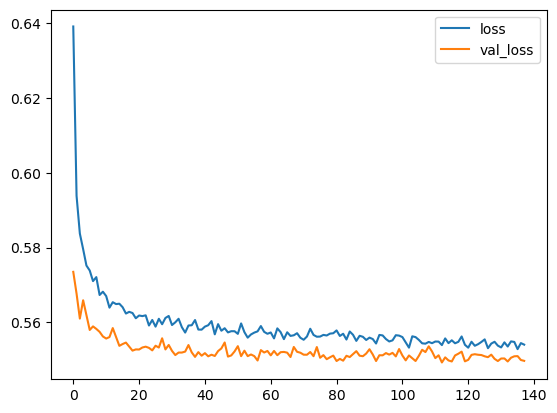

In [35]:
model_losses_df[['loss','val_loss']].plot()

## This is the type of plot  expecting where both losses decrease and approach to each other at about similar rate. Both the loss and the val_loss decreased and converge. Therefore, the Dropout layer has improved our model. The accuracy has improved a bit as shown below

In [37]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=0)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.5497154593467712, Accuracy: 0.7315840721130371


##  Note: I did not use google colab and did not save it as HDF5